Mean squared error: 1348738621.68
R² score: 0.31

Feature Importance:
ram_gb: 0.15
ssd: 0.77
hdd: 0.00
graphic_card_gb: 0.08


/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4602/1479291094.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4602/1479291094.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float)
/var/folders/sg/c8shysm54wqgb7jcv9cz00000000gn/T/ipykernel_4602/1479291094.py:18: SettingWithCopyWarning: 
A value is trying to be set o

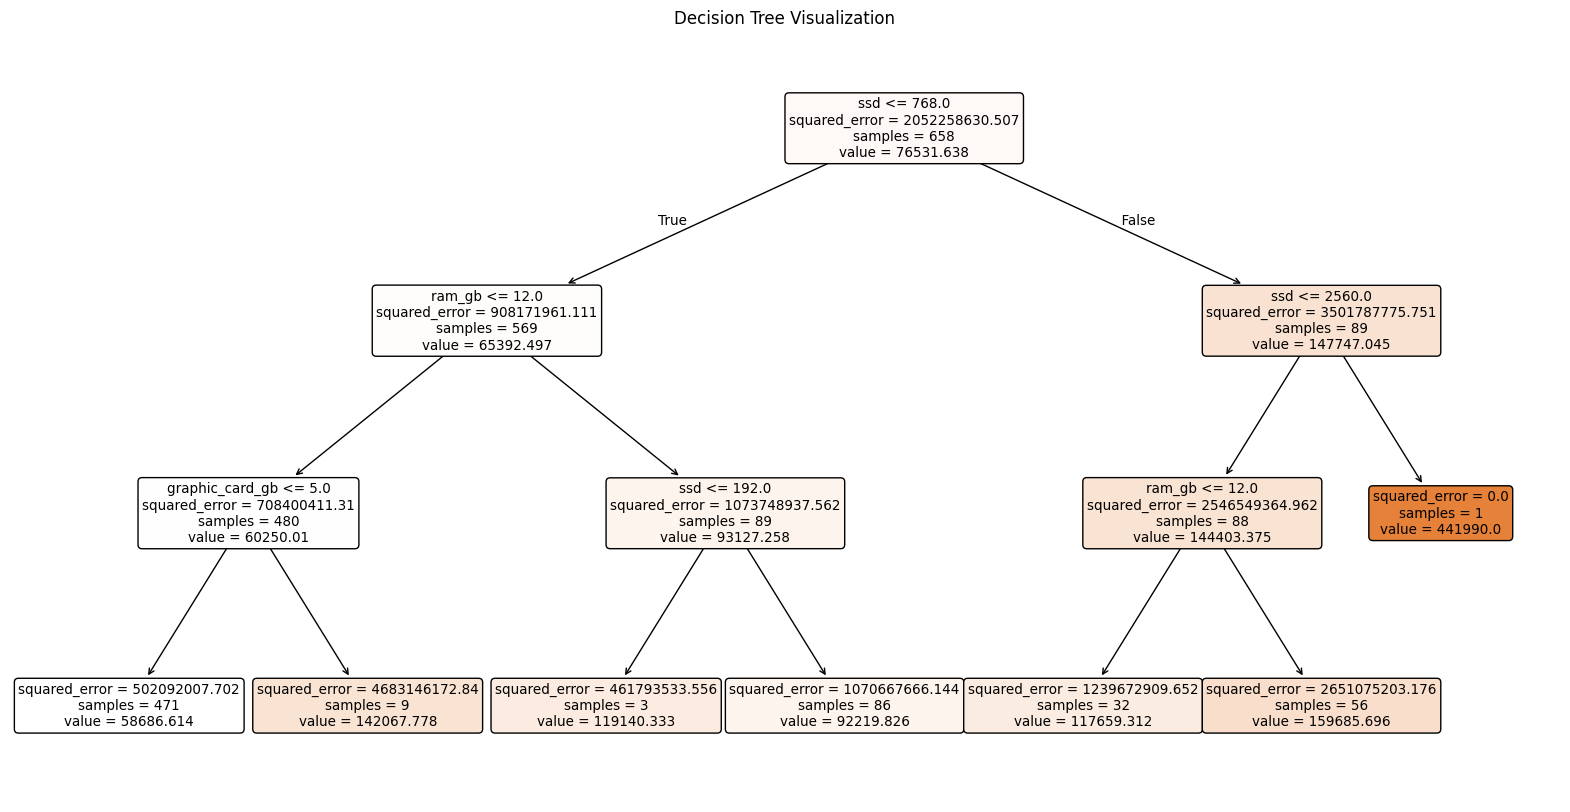

<Figure size 1000x600 with 0 Axes>

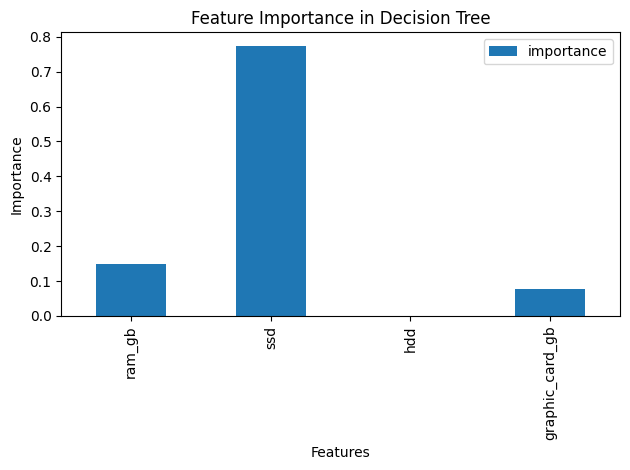

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('laptopPrice.csv')

# Select features
X = df[['ram_gb', 'ssd', 'hdd', 'graphic_card_gb']]
y = df['Price']

# Clean data by removing 'GB' and converting to float
X['ram_gb'] = X['ram_gb'].str.replace(' GB', '').astype(float)
X['ssd'] = X['ssd'].str.replace(' GB', '').astype(float) 
X['hdd'] = X['hdd'].str.replace(' GB', '').astype(float)
X['graphic_card_gb'] = X['graphic_card_gb'].str.replace(' GB', '').astype(float)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
dt_model = DecisionTreeRegressor(random_state=42, max_depth=3)  # Limiting depth for better visualization
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse:.2f}")
print(f"R² score: {r2:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
})
print("\nFeature Importance:")
for idx, row in feature_importance.iterrows():
    print(f"{row['feature']}: {row['importance']:.2f}")

# Visualize decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Plot feature importance
plt.figure(figsize=(10,6))
feature_importance.plot(x='feature', y='importance', kind='bar')
plt.title("Feature Importance in Decision Tree")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

